# AI Sign Language Interpreter - CNN Model

## 1. Imports

In [2]:
# Notebook: CNN Deep Learning Model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model

/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 2. Data Preprocessing for Modeling

This section loads and normalizes the sign language data to prepare it for training and evaluation.

In [3]:
X_train = pd.read_csv('../data/processed/X_train_scaled.csv')
X_test = pd.read_csv('../data/processed/X_test_scaled.csv')
Y_train = pd.read_csv('../data/processed/y_train.csv')
Y_test = pd.read_csv('../data/processed/y_test.csv')

Y_train

,label
0,3
1,6
2,2
3,2
4,13
...,...
27450,13
27451,23
27452,18
27453,17


In [4]:
# Reshape images to (28, 28, 1) for modeling. 
# The array is converted from 1-D to 3-D which is the required input to the first layer of the CNN.

X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_test = X_test.to_numpy().reshape(-1, 28, 28, 1)

In [5]:
# Fix encoding for categorical_crossentropy

Y_train = to_categorical(Y_train, num_classes=25)
Y_test = to_categorical(Y_test, num_classes=25)

print(Y_train.shape)
print(Y_test.shape)

(27455, 25)
(7172, 25)


## 3. Creating and Layering CNN Model

### CNN Model Overview

- **1st Convolutional Layer**: 128 filters, 5×5 kernel size, ReLU activation
- **1st Max Pooling Layer**: 3×3 pool size, stride 2

- **2nd Convolutional Layer**: 64 filters, 2×2 kernel size, ReLU activation
- **2nd Max Pooling Layer**: 2×2 pool size, stride 2  

- **3rd Convolutional Layer**: 32 filters, 2×2 kernel size, ReLU activation 
- **3rd Max Pooling Layer**: 2×2 pool size, stride 2

In [6]:
model = Sequential()

In [7]:
# Adding the first convolutional and pooling layer

model.add(Conv2D(128, kernel_size=(5,5), strides=1, padding='same', 
                    activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3), strides=2, padding='same'))

/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Adding the second convolutional and pooling layer

model.add(Conv2D(64, kernel_size=(2,2), strides=1, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

In [9]:
# Adding the third convolutional and pooling layer

model.add(Conv2D(32, kernel_size=(2,2), strides=1, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

In [10]:
model.add(Flatten())  # turn 3D into 1D (rolling image into list)

**Dense and Output Layers**

In [11]:
model.add(Dense(512, activation='relu'))  # fully connected layer to learn combinations of features
model.add(Dropout(0.25))  # prevent overfitting by turning of 25% of neurons
model.add(Dense(25, activation='softmax'))  # final output layer. classifies 25 letters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,865 (1.22 MB)

 Trainable params: 319,865 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Model Training

In [12]:
# Compile model using automatic learning rate adjustment for multi-class classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=0,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

history = model.fit(
    train_datagen.flow(X_train, Y_train, batch_size=200),
    epochs=35,
    validation_data=(X_test, Y_test),
    shuffle=1
)

Epoch 1/35


/Users/adityasharma/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.0680 - loss: 3.1284 - val_accuracy: 0.2624 - val_loss: 2.2904
Epoch 2/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.2554 - loss: 2.3946 - val_accuracy: 0.5296 - val_loss: 1.4528
Epoch 3/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4358 - loss: 1.7356 - val_accuracy: 0.5784 - val_loss: 1.1602
Epoch 4/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.5470 - loss: 1.3554 - val_accuracy: 0.7395 - val_loss: 0.7548
Epoch 5/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.6181 - loss: 1.1386 - val_accuracy: 0.7422 - val_loss: 0.6833
Epoch 6/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.6731 - loss: 0.9732 - val_accuracy: 0.8187 - val_loss: 0.5589
Epoch 7/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7117 - loss: 0.8451 - val_accuracy: 0.8125 - val_loss: 0.5723
Epoch 8/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7504 - loss: 0.7349 - val_accuracy: 0.883

## 5. Final Model Metrics

In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9956 - loss: 0.0229


In [15]:
print(f"Test accuracy: {accuracy * 100}%")
print(f"Final loss: {loss}")

Test accuracy: 99.55381751060486%
Final loss: 0.02217726968228817


In [16]:
model.save("../models/model.keras")

## 6. Model Visualizations

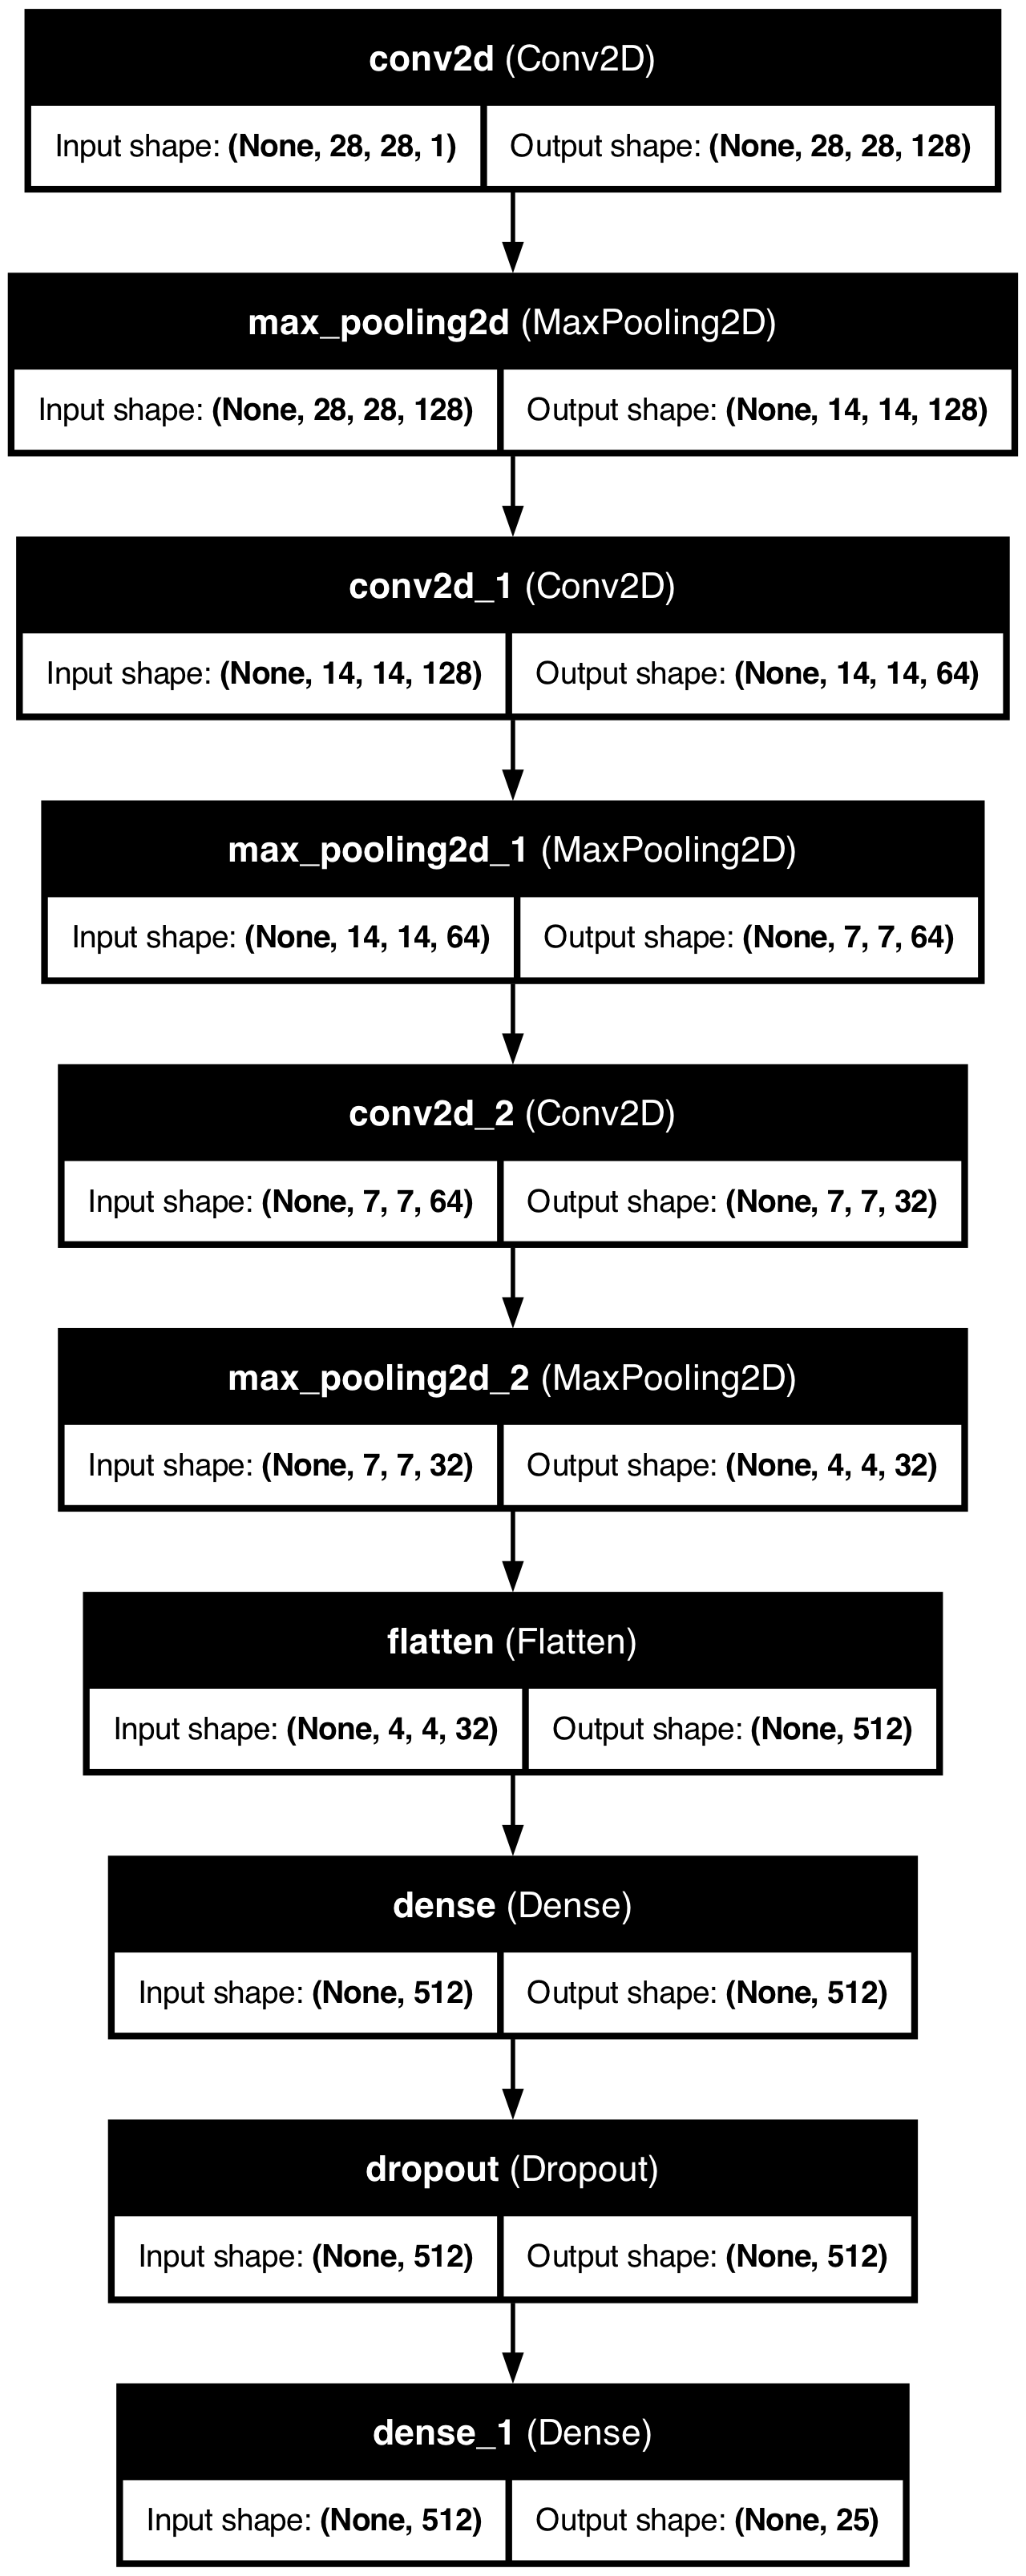

In [17]:
plot_model(model, to_file='../images/cnn_model_architecture.png', show_shapes=True, show_layer_names=True)

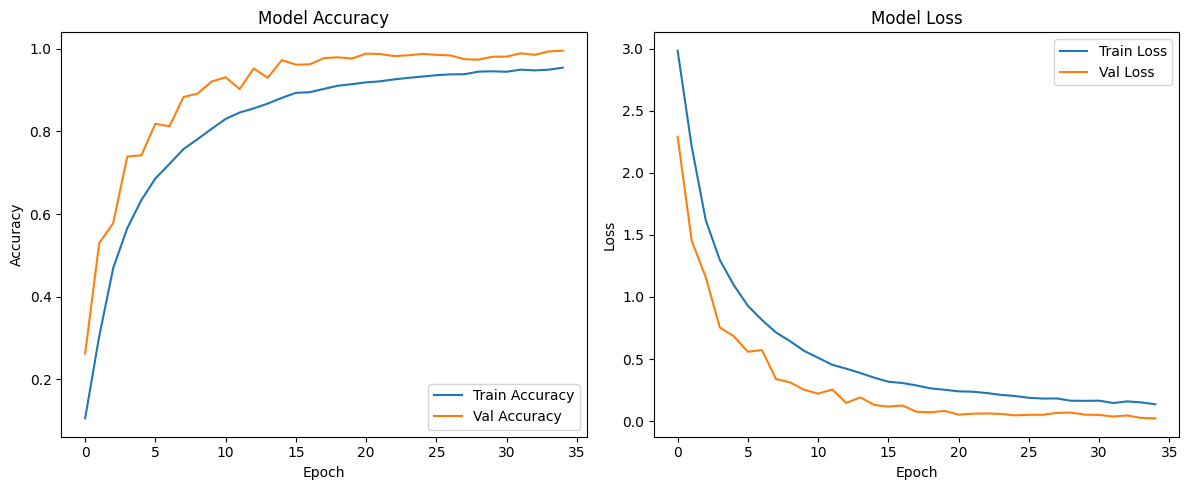

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('../images/accuracy_loss_plot.png') # Save to images folder
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


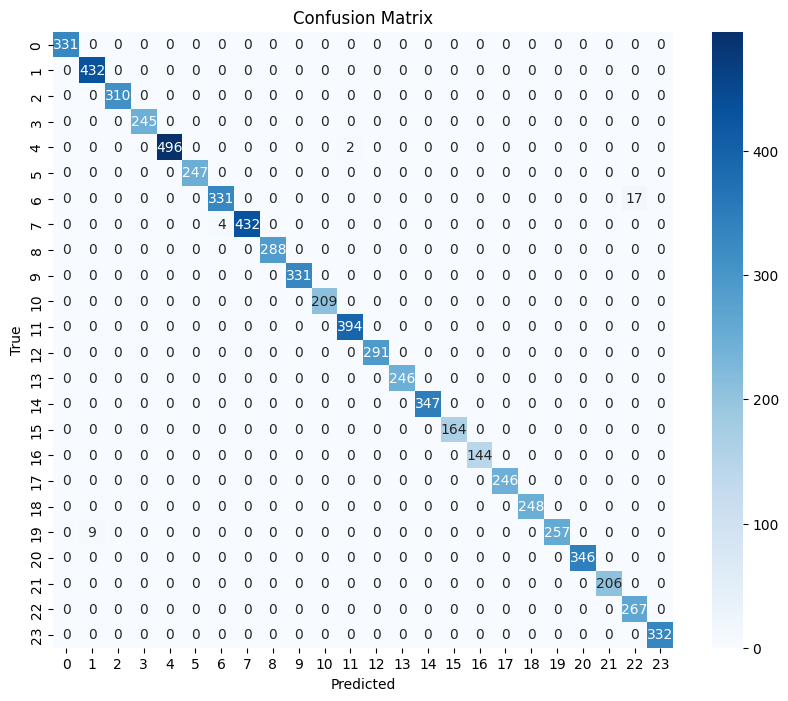

In [22]:
# Predict on test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../images/confusion_matrix.png') # Save to images folder
plt.show()

In [20]:
# Print classification report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.98      1.00      0.99       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.99      0.95      0.97       348
           7       1.00      0.99      1.00       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       0.99      1.00      1.00       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       1.00      1.00      1.00       144
          18       1.00    